

---


# **ML prediction**
#### ***Look before you Leap : Leveraging Predictive Models to Improve Automotive Safety and Travel Time***



---



**Final Project**
CSCI 35300/79502  
##### Hannah Do







---

### Comparison on datasets with addition of twitter features 
- importing different files for cross validation and evaluation

In [10]:
# Import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import csv
import datetime, string, re
import sys, os, warnings

from numpy import sqrt, argmax
from collections import Counter

from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer



**Different ML models**

In [2]:
# Create a function with many machine learning models 

def models_cross(X,y):

    list1 = []

    # kNN
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)

    knn_acc=accuracy_score(y_test, y_pred)
    list1.append(knn_acc)
    print('kNN accuracy score : ', knn_acc)
    

   # SVC (poly kernel)
    svc = SVC(random_state = 4, C= 50, gamma= 'scale', kernel= 'poly')
    svc_scores = cross_val_score(svc, X, y, cv=8,n_jobs=-1)
#     print('SVC Cross-Validation Accuracy Scores', svc_scores)
    svc_scores_series = pd.Series(svc_scores)
    list1.append(svc_scores_series.mean())
    print('SVC accuracy score : ', svc_scores_series.mean())


    # GaussianNB
    gauss = GaussianNB()
    gauss_scores = cross_val_score(gauss, X, y, cv=8, n_jobs=-1)
#     print('GaussianNB Cross-Validation Accuracy Scores', gauss_scores)
    gauss_scores_series = pd.Series(gauss_scores)
    list1.append(gauss_scores_series.mean())
    print('Gaussian NB accuracy score : ', gauss_scores_series.mean())

            
    # Decision Tree
    tree = DecisionTreeClassifier(criterion = 'gini', max_depth='None', max_features='None', min_samples_leaf=2, min_samples_split=3)
    tree_scores = cross_val_score(tree, X, y, cv=8,n_jobs=-1)
#     print('Decision Tree Cross-Validation Accuracy Scores', tree_scores)
    tree_scores_series = pd.Series(tree_scores)
    list1.append(tree_scores_series.mean())
    print('Decision Tree accuracy score : ', tree_scores_series.mean())


    # Random Forest Classifier 
    forest = RandomForestClassifier(n_estimators=1000, max_features = 'sqrt')
    forest_scores = cross_val_score(forest, X, y, cv=8,n_jobs=-1)
#     print('Random forest Cross-Validation Accuracy Scores', forest_scores)
    forest_scores_series = pd.Series(forest_scores)
    list1.append(forest_scores_series.mean())
    print('Random Forest accuracy score : ', forest_scores_series.mean())
   

    # Logistic Regression
    # multi_class='ovr', c=0.1, penalty='l2', solver='newton-cg'
    log = LogisticRegression()
    log_scores = cross_val_score(log, X, y, cv=8,n_jobs=-1)
#     print('Logistic regression Cross-Validation Accuracy Scores', log_scores)
    log_scores_series = pd.Series(log_scores)
    list1.append(log_scores_series.mean())
    print('Logistic Regression accuracy score : ', log_scores_series.mean())

    
    # XGBoost Classifier
    xg = XGBClassifier(objective='binary:logistic', learning_rate=0.5, max_depth=5)
    xg_scores = cross_val_score(xg, X, y, cv=8,n_jobs=-1)
#     print('XGBoost Cross-Validation Accuracy Scores', xg_scores)
    xg_scores_series = pd.Series(xg_scores)
    list1.append(xg_scores_series.mean())
    print('XGBoost accuracy score : ', xg_scores_series.mean())

    return list1

In [4]:
final_table = pd.DataFrame()

files = ['processed_1mo_smote', 'processed_1mo_realistic', 'processed_3mo_smote', 'processed_3mo_realistic', 'processed_6mo_realistic_short', 'processed_6mo_smote_short']
# processed_1mo_smote
# processed_1mo_realistic
# processed_3mo_smote
# ...

i = 1
    
for f in files:

    print('\n' + f)
    temp = pd.read_csv('merged/' + f + '.csv', sep=',')

    temp = temp.drop(columns = ['Unnamed: 0'], axis=1)
    # drop NaN column with index values

    list1 = pd.DataFrame()

    y = temp['target']
    X = temp.drop('target', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    list1 = models_cross(X,y)

    final_table['twitter '+ f + str(i)] = list1
    
    
    print('\n' + f + ' accident record')

    list2 = pd.DataFrame()

    y = temp['target']
    X = temp.drop('target', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    list2 = models_cross(X,y)

    final_table['accident '+ f + str(i)] = list2

    i = i+1
    
final_table


In [6]:
ml_models = ['KNN', 'SVC', 'Gaussian NB', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'XGBoost']
# 'SVC-rbf', 

final_table.index = ml_models

### Feature Importance - Random Forest

In [40]:
temp = pd.read_csv('02032022/smote_1mo.csv', sep=',')

temp = temp.drop(columns = ['Unnamed: 0'], axis=1)
# drop NaN column with index values

list0 = pd.DataFrame()

y = temp['target']
X = temp.drop('target', axis=1)    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

No handles with labels found to put in legend.


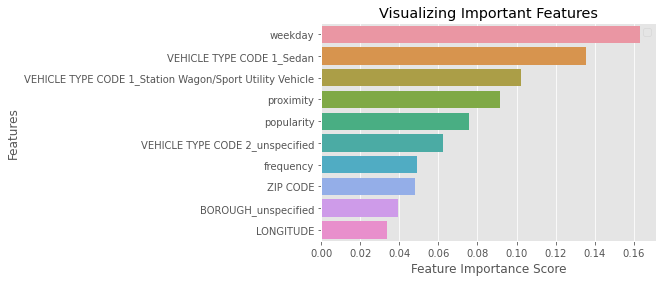

In [39]:
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train, y_train)

feature_imp = pd.Series(forest.feature_importances_,index=X_train.columns).sort_values(ascending=False)

k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Evaluation on Random Forest Model
1. Dataset with Accidents, Smote method, and boosting Negative Instances - 6 months

In [12]:
temp = pd.read_csv('02032022/negboost_1mo.csv', sep=',')

temp = temp.drop(columns = ['Unnamed: 0'], axis=1)
# drop NaN column with index values

y = temp['target']
X = temp.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:

y_pred = cross_val_predict(forest, X_test, y_test, method="predict_proba", cv=5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred)


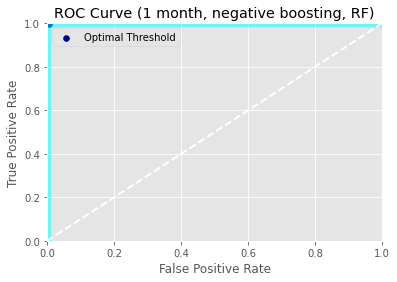

Optimal Threshold:  0.8
Coordinate : ( 0.004701995170923879 ,  0.9962985811227637 )
AUC score :  0.9998857368997847


In [26]:
geomean_list = sqrt(tpr * (1-fpr))  # getting geometric mean for tpr and fpr
max_index = argmax(geomean_list) # getting the maximum mean index from the list of tpr and fpr coordinates

plt.style.use('ggplot')

def plot_roc_curve(fpr, tpr, label=None): 
    plt.scatter(fpr[max_index], tpr[max_index], marker='o', c='navy', label='Optimal Threshold')
    # plotting the optimal threshold coordinate as a dot
    
    plt.plot(fpr, tpr, color='cyan', alpha=0.5, linewidth=8, label=label) 
    # alpha parameter added for opacity - to show the optimal threshold dot that was hidden beneath it
    
    plt.plot([0, 1], [0, 1], color='white', lw=2, linestyle='--')
    ax1 = fig.add_subplot(111)
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (1 month, negative boosting, RF)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    
plot_roc_curve(fpr, tpr)

print("Optimal Threshold: ", thresholds[max_index])
print("Coordinate : (", fpr[max_index],", ", tpr[max_index], ")")
print("AUC score : ", roc_auc_score(y_test ,y_pred))

In [25]:
roc_auc_score(y_test, y_pred)

0.9998857368997847

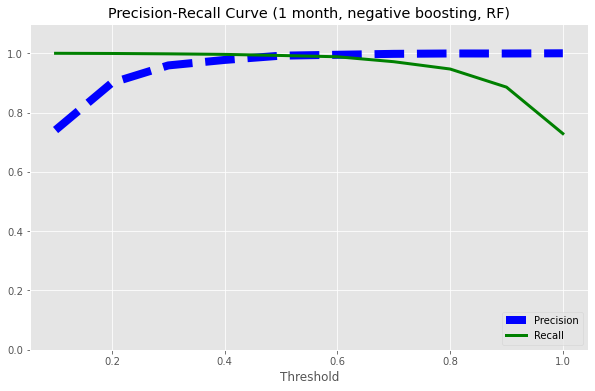

Optimal Threshold:  -1


In [27]:
plt.style.use('ggplot')

# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

fig = plt.figure(figsize=(10, 6))
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--",  linewidth=8, label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-",  linewidth=3, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve (1 month, negative boosting, RF)')
    plt.ylim([0, 1.1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


threshold_optimal = -1
for i in range(len(precisions)):
    if(precisions[i] == recalls[i]):
        threshold_optimal = thresholds[i]

print("Optimal Threshold: ", threshold_optimal)

In [34]:
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Confusion Matrix:
[[7864    5]
 [   8 1613]]


In [35]:
precision_test = precision_score(y_test, y_pred) 
print("Test Precision = %f" % precision_test)

Test Precision = 0.996910


In [36]:
recall_test = recall_score(y_test, y_pred)
print("Test Recall = %f" % recall_test)

Test Recall = 0.995065


In [37]:
f1_test = f1_score(y_test, y_pred)
print("Test F1 Score = %f" % f1_test)

Test F1 Score = 0.995986
